In [1]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from operator import add
from langgraph.graph.message import add_messages
from langchain_core.messages import HumanMessage, AIMessage
from langchain_openai import ChatOpenAI

from dotenv import load_dotenv
load_dotenv()

True

In [2]:
# add_messages 기능은 클릭해서 꼭 보세요.

### 1. State 정의: add, add_messages 비교해서 사용해볼 state 설정

In [3]:
class CompareState(TypedDict):
    item : Annotated[list[str], add]

    messages : Annotated[list, add_messages]

### 2. 노드 추가

In [ ]:
def step1_add_data(state: CompareState) -> CompareState:
    """첫번째 데이터 추가하기"""

    print("첫번째 데이터 추가하기")
    print("item: ['칸초', '초코송이']")
    print("messages: Humanmessages('안녕')")

    return {
        "item" : ["칸초", "초코송이"],
        "messages" : [HumanMessage(content="안녕"), ]
    }

def step2_add_data(state: CompareState) -> CompareState:
    """두번째 데이터 추가하기"""

    print("두번째 데이터 추가하기")
    print("item: ['초코송이', '홈런볼']")
    print("messages: AImessages('반가워요')")

    return {
        "item" : ["초코송이", "홈런볼"],
        "messages" : [AIMessage(content="반가워요")]
    }

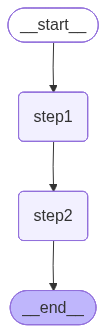

In [20]:
# 그래프 생성하기
workflow = StateGraph(CompareState)
workflow.add_node("step1", step1_add_data)
workflow.add_node("step2", step2_add_data)

# 엣지
workflow.add_edge("step1", "step2")

# 스타트
workflow.add_edge(START, "step1")

# 엔드
workflow.add_edge("step2", END)

# 빌드
app = workflow.compile()
app

In [21]:
result = app.invoke({
    "item": [],
    "messages" : []
})
print(result)

첫번째 데이터 추가하기
item: ['칸초', '초코송이']
messages: Humanmessages('안녕')
두번째 데이터 추가하기
item: ['초코송이', '홈런볼']
messages: Humanmessages('반가워요')
{'item': ['칸초', '초코송이', '초코송이', '홈런볼'], 'messages': [HumanMessage(content='안녕', additional_kwargs={}, response_metadata={}, id='5858f958-27be-4946-96ea-3c0ae000bfb2'), AIMessage(content='반가워요', additional_kwargs={}, response_metadata={}, id='899dfe58-4dbb-42a1-b634-af0ebb02c009')]}


In [ ]:
## llm 붙여보기 새로운 그래프

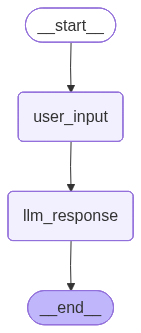

In [ ]:
# 모델 정의
llm = ChatOpenAI(
    model = "gpt-4.1-mini",
    temperature = 0.2
)


# State 정의
class ChatState(TypedDict):
    user_input : str
    messages : Annotated[list, add_messages]


# 노드 정의
# 1. 사용자 입력 노드
# 2. llm 답변 노드

def user_input(state: ChatState) -> ChatState:
    """사용자 입력을 확인해서 저장하는 노드"""
    user_input = state.get("user_input", "안녕하세요 차요준입니다.")
    print("입력합 값은", user_input)

    return {
        "user_input" : user_input,
        "messages" : [HumanMessage(content = user_input)]
    }


def llm_response(state: ChatState) -> ChatState:
    response = llm.invoke(state.get("messages", "안녕하세요 윤택환입니다."))
    return {**state,
        "messages" : [response]
    }

# 그래프
chat_workflow = StateGraph(ChatState)
chat_workflow.add_node("user_input", user_input)
chat_workflow.add_node("llm_response", llm_response)

chat_workflow.add_edge("user_input", "llm_response")

chat_workflow.set_entry_point("user_input")
chat_workflow.set_finish_point("llm_response")

app = chat_workflow.compile()
app

In [31]:
result = app.invoke(
    {"user_input" : "",
     "messages" : []
     }
)
print(result)

입력합 값은 
{'user_input': '', 'messages': [HumanMessage(content='', additional_kwargs={}, response_metadata={}, id='ce97df4a-8c60-4c14-bbf8-ecb0164e3c74'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 7, 'total_tokens': 16, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_4c2851f862', 'id': 'chatcmpl-CVuemvQrJx7tpWCY7F6Vf7Ycg3eoC', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--14a70e92-6dcd-486f-8335-20a2f13666d3-0', usage_metadata={'input_tokens': 7, 'output_tokens': 9, 'total_tokens': 16, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}


In [32]:
result

{'user_input': '',
 'messages': [HumanMessage(content='', additional_kwargs={}, response_metadata={}, id='ce97df4a-8c60-4c14-bbf8-ecb0164e3c74'),
  AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 7, 'total_tokens': 16, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_4c2851f862', 'id': 'chatcmpl-CVuemvQrJx7tpWCY7F6Vf7Ycg3eoC', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--14a70e92-6dcd-486f-8335-20a2f13666d3-0', usage_metadata={'input_tokens': 7, 'output_tokens': 9, 'total_tokens': 16, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}